In [1]:
import scanpy as sc
import decoupler as dc

# Only needed for processing
import numpy as np
import pandas as pd

# Needed for some plotting
import matplotlib.pyplot as plt
import anndata as ad

# Import DESeq2
from pydeseq2.dds import DeseqDataSet, DefaultInference
from pydeseq2.ds import DeseqStats

import pypath
import seaborn as sns


# Plotting options, change to your liking
sc.settings.set_figure_params(dpi=200, frameon=False)
sc.set_figure_params(dpi=200)
sc.set_figure_params(figsize=(4, 4))

In [2]:
#load cart (Myc+) data.
t_cell_re_clustered = '../t_cell_analysis/t_cell_myc_pos.h5ad'

# Read the HDF5 file into a DataFrame
t_cell_data = ad.read_h5ad(t_cell_re_clustered)

In [25]:
t_cell_data

AnnData object with n_obs × n_vars = 2982 × 17278
    obs: 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_score', 'predicted_doublet', 'batch', 'Condition', 'louvain', 'Cell_type_generic', 'T_cell_type_fine', 'T_cells'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells-0', 'n_cells_by_counts-0', 'mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'n_cells-1', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'n_cells-2', 'n_cells_by_counts-2', 'mean_counts-2', 'pct_dropout_by_counts-2', 'total_counts-2', 'n_cells-3', 'n_cells_by_counts-3', 'mean_counts-3', 'pct_dropout_by_counts-3', 'total_counts-3', 'n_cells-4', 'n_cells_by_counts-4', 'mean_counts-4', 'pct_dropout_by_counts-4', 'total_counts-4', 'n_cells-5', 'n_cells_by_counts-5', 'mean_counts-5', 'pct_dropout_by_counts-5', 'total_counts-5', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Condit

In [3]:
t_cell_data.obs

,Sample,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,doublet_score,predicted_doublet,batch,Condition,louvain,Cell_type_generic,T_cell_type_fine
AAACGAACATCGTGCG-1-0,out_Mouse_11,4211,4211,16711.0,850.0,5.086470,0.085714,False,0,CART_RAD,8,T_cells,T_effector_cytotoxic_2
AAAGGTACAGGCGATA-1-0,out_Mouse_11,903,901,1461.0,76.0,5.201916,0.071947,False,0,CART_RAD,0,T_cells,Naive_1
AAAGTGATCTTCCTAA-1-0,out_Mouse_11,450,450,759.0,28.0,3.689065,0.014776,False,0,CART_RAD,4,T_cells,T_ribosomal
AAATGGAGTAACGATA-1-0,out_Mouse_11,3762,3760,13832.0,225.0,1.626663,0.103930,False,0,CART_RAD,0,T_cells,Naive_1
AAATGGATCTAGTACG-1-0,out_Mouse_11,1979,1978,5255.0,143.0,2.721218,0.117988,False,0,CART_RAD,7,T_cells,T_effector
...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTCATGTCAGTGATC-1-5,out_Mouse_8,2812,2812,8524.0,191.0,2.240732,0.027108,False,5,CART,2,Treg,Tregs_2
TTTCCTCCAGTATACC-1-5,out_Mouse_8,3822,3821,14011.0,352.0,2.512312,0.084693,False,5,CART,2,Treg,Tregs_2
TTTGACTAGCGAACTG-1-5,out_Mouse_8,1588,1588,3390.0,63.0,1.858407,0.014409,False,5,CART,1,Treg,Tregs_1
TTTGTTGCAACAGCTT-1-5,out_Mouse_8,2420,2420,6374.0,65.0,1.019768,0.024937,False,5,CART,1,Treg,Tregs_1


In [4]:
#they want all the tcells together. so we will create a pseudobulk based on all t cells. 
t_cell_data.obs['T_cells']="T_cell"
t_cell_data.obs

,Sample,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,doublet_score,predicted_doublet,batch,Condition,louvain,Cell_type_generic,T_cell_type_fine,T_cells
AAACGAACATCGTGCG-1-0,out_Mouse_11,4211,4211,16711.0,850.0,5.086470,0.085714,False,0,CART_RAD,8,T_cells,T_effector_cytotoxic_2,T_cell
AAAGGTACAGGCGATA-1-0,out_Mouse_11,903,901,1461.0,76.0,5.201916,0.071947,False,0,CART_RAD,0,T_cells,Naive_1,T_cell
AAAGTGATCTTCCTAA-1-0,out_Mouse_11,450,450,759.0,28.0,3.689065,0.014776,False,0,CART_RAD,4,T_cells,T_ribosomal,T_cell
AAATGGAGTAACGATA-1-0,out_Mouse_11,3762,3760,13832.0,225.0,1.626663,0.103930,False,0,CART_RAD,0,T_cells,Naive_1,T_cell
AAATGGATCTAGTACG-1-0,out_Mouse_11,1979,1978,5255.0,143.0,2.721218,0.117988,False,0,CART_RAD,7,T_cells,T_effector,T_cell
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTCATGTCAGTGATC-1-5,out_Mouse_8,2812,2812,8524.0,191.0,2.240732,0.027108,False,5,CART,2,Treg,Tregs_2,T_cell
TTTCCTCCAGTATACC-1-5,out_Mouse_8,3822,3821,14011.0,352.0,2.512312,0.084693,False,5,CART,2,Treg,Tregs_2,T_cell
TTTGACTAGCGAACTG-1-5,out_Mouse_8,1588,1588,3390.0,63.0,1.858407,0.014409,False,5,CART,1,Treg,Tregs_1,T_cell
TTTGTTGCAACAGCTT-1-5,out_Mouse_8,2420,2420,6374.0,65.0,1.019768,0.024937,False,5,CART,1,Treg,Tregs_1,T_cell


Generation of pseudo-bulk profiles

After the annotation of clusters into cell identities, we often would like to perform differential expression analysis (DEA) between conditions within particular cell types to further characterize them. DEA can be performed at the single-cell level, but the obtained p-values are often inflated as each cell is treated as a sample. We know that single cells within a sample are not independent of each other, since they were isolated from the same environment. If we treat cells as samples, we are not testing the variation across a population of samples, rather the variation inside an individual one. Moreover, if a sample has more cells than another it might bias the results.

The current best practice to correct for this is using a pseudo-bulk approach (Squair J.W., et al 2021), which involves the following steps:

Subsetting the cell type(s) of interest to perform DEA.
Extracting their raw integer counts.
Summing their counts per gene into a single profile if they pass quality control.
Performing DEA if at least two biological replicates per condition are available (more replicates are recommended).
We can pseudobulk using the function decoupler.get_pseudobulk. In this example, we are interested in summing the counts but other modes are available, for more information check its argument mode.

In [5]:
# Get pseudo-bulk profile
pdata = dc.get_pseudobulk(
    t_cell_data,
    sample_col='Sample',
    groups_col='T_cells',
    layer='counts',
    mode='sum',
    min_cells=10,
    min_counts=1000
)

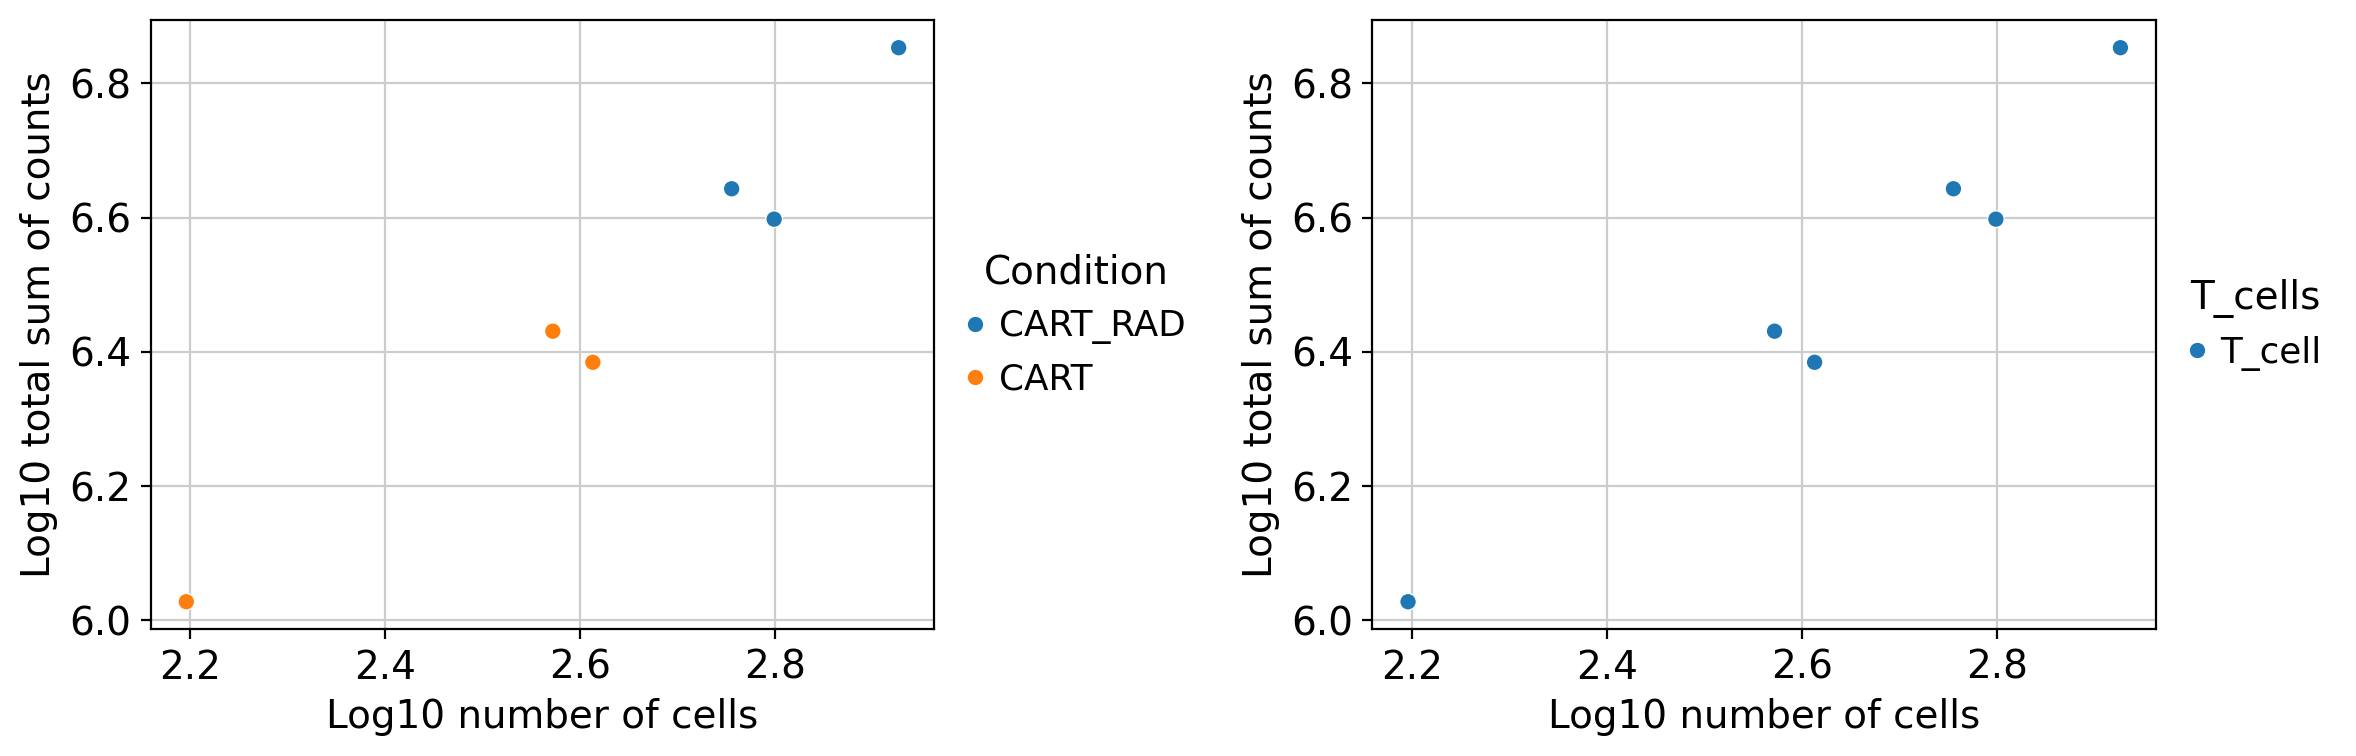

In [6]:
dc.plot_psbulk_samples(pdata, groupby=['Condition', 'T_cells'], figsize=(12, 4))


In [7]:
# Store raw counts in layers
pdata.layers['counts'] = pdata.X.copy()

# Normalize, scale and compute pca
sc.pp.normalize_total(pdata, target_sum=1e4)
#pdata.layers['norm'] = pdata.X.copy()

# Retrieve gene names and column names
gene_names = pdata.var_names  # or pdata.var.index, depending on your AnnData version
column_names = pdata.obs_names  # or pdata.obs.index, depending on your AnnData version
#df = pd.DataFrame(pdata.layers['counts'], index=column_names, columns=gene_names)
#t_df = df.T
#t_df.to_csv("CART_myc_pos_cells_pseudobulk_raw_expr.csv", index=True)


# Create a DataFrame from the log-transformed data
#df = pd.DataFrame(pdata.layers['norm'], index=column_names, columns=gene_names)
#t_df = df.T
#t_df.to_csv("CART_myc_pos_cells_pseudobulk_norm_expr.csv", index=True)



In [8]:
#log transform
sc.pp.log1p(pdata)
pdata.layers['log_transform'] = pdata.X.copy()


In [9]:

sc.pp.scale(pdata, max_value=10)
sc.tl.pca(pdata)


In [10]:
# Return raw counts to X. we need this to run deseq. deseq2 needs raw counts
dc.swap_layer(pdata, 'counts', X_layer_key=None, inplace=True)

Pseudo-bulk profile gene filtering

Additionally to filtering low quality samples, we can also filter noisy expressed genes in case we want to perform downstream analyses such as DEA afterwards. Note that this step should be done at the cell type level, since each cell type may express different collection of genes.

To filter genes, we will follow the strategy implemented in the function filterByExpr from edgeR. It keeps genes that have a minimum total number of reads across samples (min_total_count), and that have a minimum number of counts in a number of samples (min_count).

We can plot how many genes do we keep, you can play with the min_count and min_total_count to check how many genes would be kept when changed:

In [11]:
log_transform_data = pdata.layers["log_transform"]

# Retrieve gene names and column names
gene_names = pdata.var_names  # or pdata.var.index, depending on your AnnData version
column_names = pdata.obs_names  # or pdata.obs.index, depending on your AnnData version

# Create a DataFrame from the log-transformed data
df = pd.DataFrame(log_transform_data, index=column_names, columns=gene_names)
t_df = df.T
t_df.to_csv("CART_myc_pos_cells_pseudobulk_log_expr.csv", index=True)

/home/maa7095/miniconda3/envs/deseq_python/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


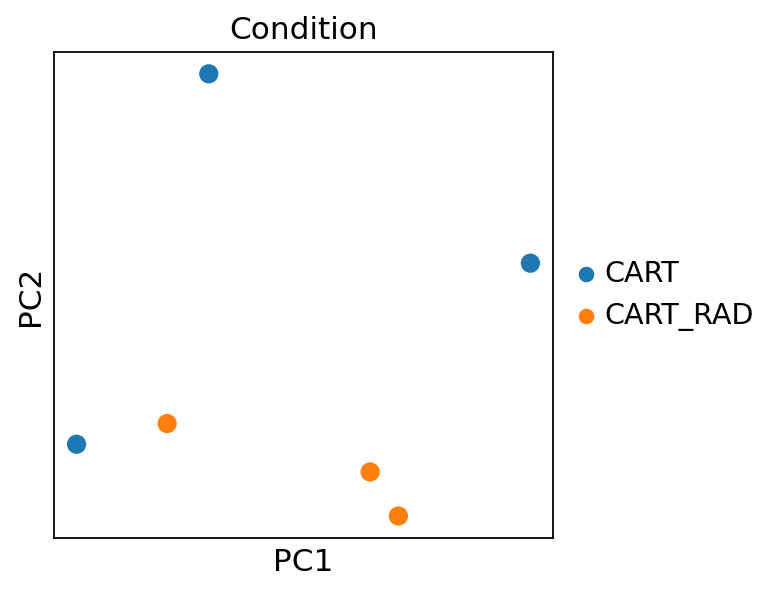

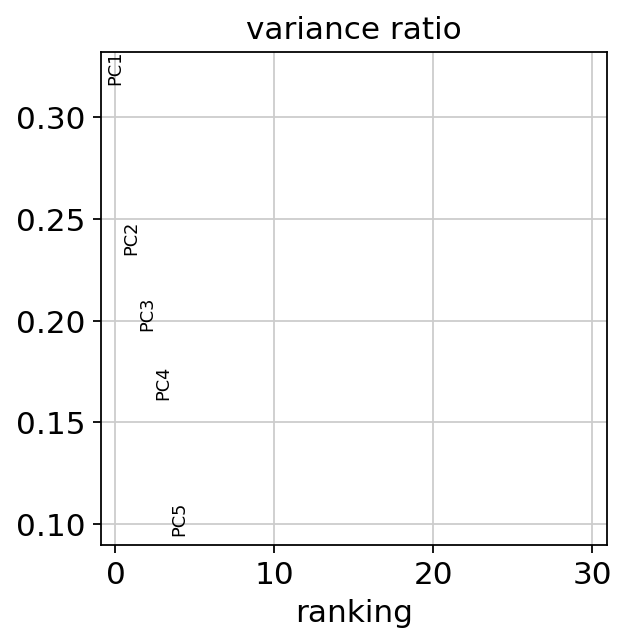

In [12]:
sc.pl.pca(pdata, color=['Condition'], ncols=1, size=300)
sc.pl.pca_variance_ratio(pdata)

Contrast between conditions

Once we have generated robust pseudo-bulk profiles, we can compute DEA. For this example, we will perform a simple experimental design where we compare the gene expression of T cells from diseased patients against controls. We will use the python implementation of the framework DESeq2, but we could have used any other one (limma or edgeR for example). For a better understanding how it works, check DESeq2’s documentation. Note that more complex experimental designs can be used by adding more factors to the design_factors argument.

/home/maa7095/miniconda3/envs/deseq_python/lib/python3.12/site-packages/pydeseq2/dds.py:257: UserWarning: Some factor levels in the design contain underscores ('_').
                    They will be converted to hyphens ('-').
  self.obsm["design_matrix"] = build_design_matrix(
Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 1.82 seconds.

Fitting dispersion trend curve...
... done in 0.20 seconds.

Fitting MAP dispersions...
... done in 1.75 seconds.

Fitting LFCs...
... done in 1.13 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 1.01 seconds.



Log2 fold change & Wald test p-value: Condition CART-RAD vs CART
                  baseMean  log2FoldChange     lfcSE      stat    pvalue  \
0610009B22Rik    20.523075       -0.232862  0.403083 -0.577704  0.563464   
0610010F05Rik    27.230484       -0.099681  0.407049 -0.244887  0.806544   
0610010K14Rik   191.658707        0.114301  0.167058  0.684196  0.493851   
0610012G03Rik   146.669998        0.253896  0.161522  1.571896  0.115975   
0610030E20Rik    56.401730       -0.262367  0.179145 -1.464553  0.143043   
...                    ...             ...       ...       ...       ...   
mt-Nd3          764.522400       -0.423916  0.357036 -1.187319  0.235102   
mt-Nd4         4870.774902       -0.025135  0.157460 -0.159628  0.873174   
mt-Nd4l         498.842529       -0.186166  0.213471 -0.872088  0.383160   
mt-Nd5         1636.832886       -0.040519  0.131768 -0.307498  0.758464   
mt-Nd6          214.219742        0.291754  0.231444  1.260582  0.207460   

                   pad

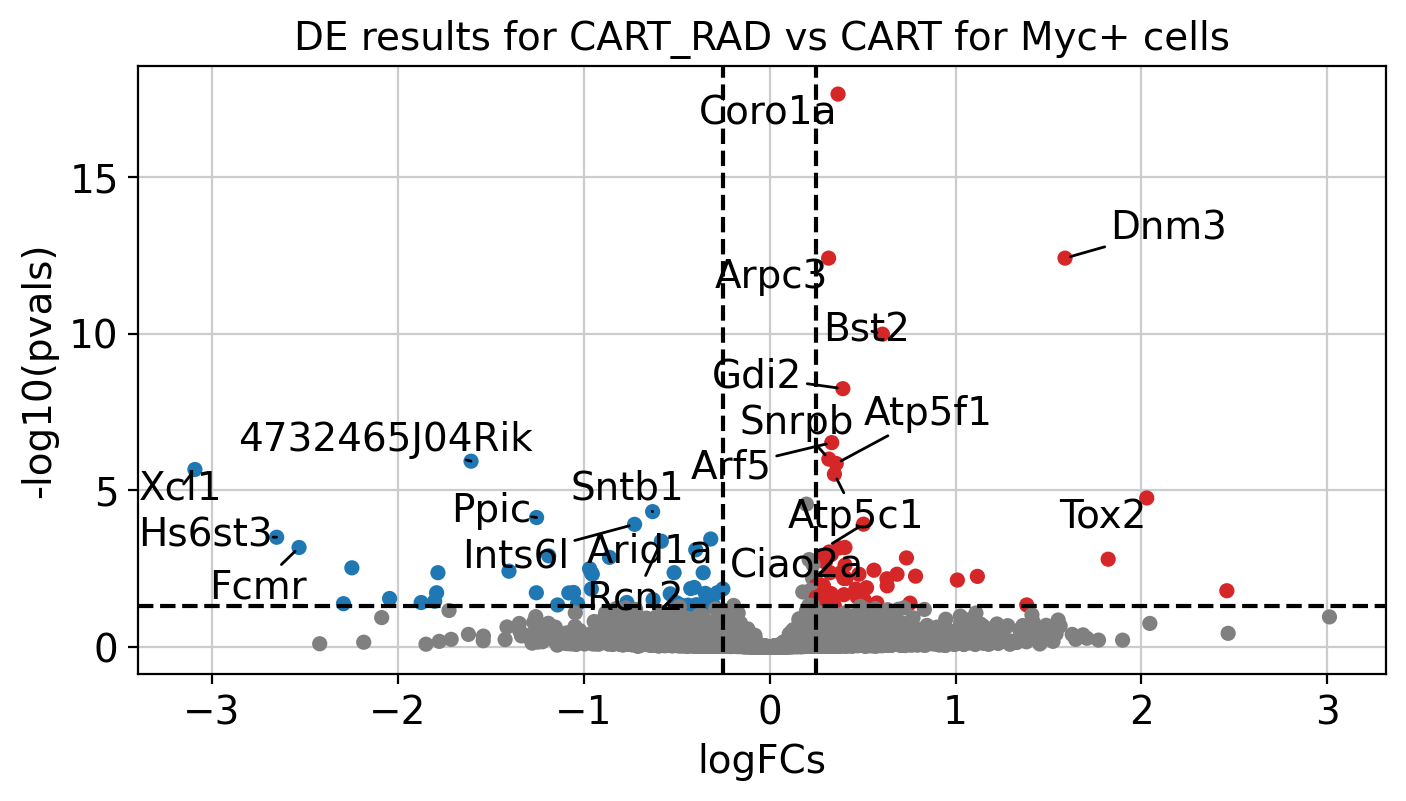

In [14]:
genes = dc.filter_by_expr(pdata, group='Condition', min_count=10, min_total_count=15)

# Filter by these genes
pdata_sub = pdata[:, genes].copy()
# Build DESeq2 object
inference = DefaultInference(n_cpus=8)
dds = DeseqDataSet(
    adata=pdata_sub,
    design_factors='Condition',
    ref_level=['Condition', 'CART'],
    refit_cooks=True,
    inference=inference,
)
# Compute LFCs
dds.deseq2()
# Extract contrast between CART-RAD vs CART
stat_res = DeseqStats(
     dds,
    alpha=0.05,
    contrast=["Condition", 'CART-RAD', 'CART'],
    inference=inference, independent_filter=True
)
    # Compute Wald test
stat_res.summary()
    # Extract results
results_df = stat_res.results_df
results_df = results_df.sort_values(by='pvalue')

#save results
file_name="CART_myc_pos_pseudo_DE.csv"
    
results_df.to_csv(file_name, index=True)

#print results
print("Number of observations with padjusted < 0.05 and log2FoldChange positive is: ", sum((results_df['padj'] < 0.05) & (results_df['log2FoldChange'] > 0)))
print("Number of observations with padjusted < 0.05 and log2FoldChange negative is: ", sum((results_df['padj'] < 0.05) & (results_df['log2FoldChange'] < 0)))

print("Number of observations with padjusted < 0.05 and log2FoldChange > 0.25 is: ", sum((results_df['padj'] < 0.05) & (results_df['log2FoldChange'] > 0.25)))
print("Number of observations with padjusted < 0.05 and log2FoldChange < -0.25 is: ", sum((results_df['padj'] < 0.05) & (results_df['log2FoldChange'] < -0.25)))


print("Number of observations with p < 0.01 and log2FoldChange positive is: ", sum((results_df['pvalue'] < 0.01) & (results_df['log2FoldChange'] > 0)))
print("Number of observations with p < 0.01 and log2FoldChange negative is: ", sum((results_df['pvalue'] < 0.01) & (results_df['log2FoldChange'] < 0)))
dc.plot_volcano_df(
    results_df,
    x='log2FoldChange',
    y='padj',
    top=20,
    figsize=(8, 4),
    sign_thr=0.05,#sig for nominal p-values
    lFCs_thr=0.25
)
# Add title to the plot
plt.title(f'DE results for CART_RAD vs CART for Myc+ cells')

# Display the plot
plt.show()
    



    

In [27]:
#Run GSEA in Myc positive T cells.
from pypath.inputs import msigdb
import pandas as pd

msigdb_mouse_raw = msigdb.msigdb_download_collections(organism = 'mouse')

msigdb_mouse_raw_df = pd.DataFrame(
    [
        (collname, collcode, gset, gene)
        for (collname, collcode), coll in msigdb_mouse_raw.items()
        for gset, genes in coll.items()
        for gene in genes
    ],
    columns = ['collection', 'code', 'geneset', 'genesymbol']
)
# Remove duplicated entries
sub_msigdb_mouse_raw_df = msigdb_mouse_raw_df[~msigdb_mouse_raw_df.duplicated(['geneset', 'genesymbol'])]
hallmark_df = sub_msigdb_mouse_raw_df[sub_msigdb_mouse_raw_df['collection']=='hallmark']
#we want to add custom pathways.
custom_pathways= pd.read_csv('../t_cell_analysis/pseudobulk_DE/custom_pathways_MF.csv')
hallmark_df_custom= pd.concat([hallmark_df,custom_pathways], axis=0)

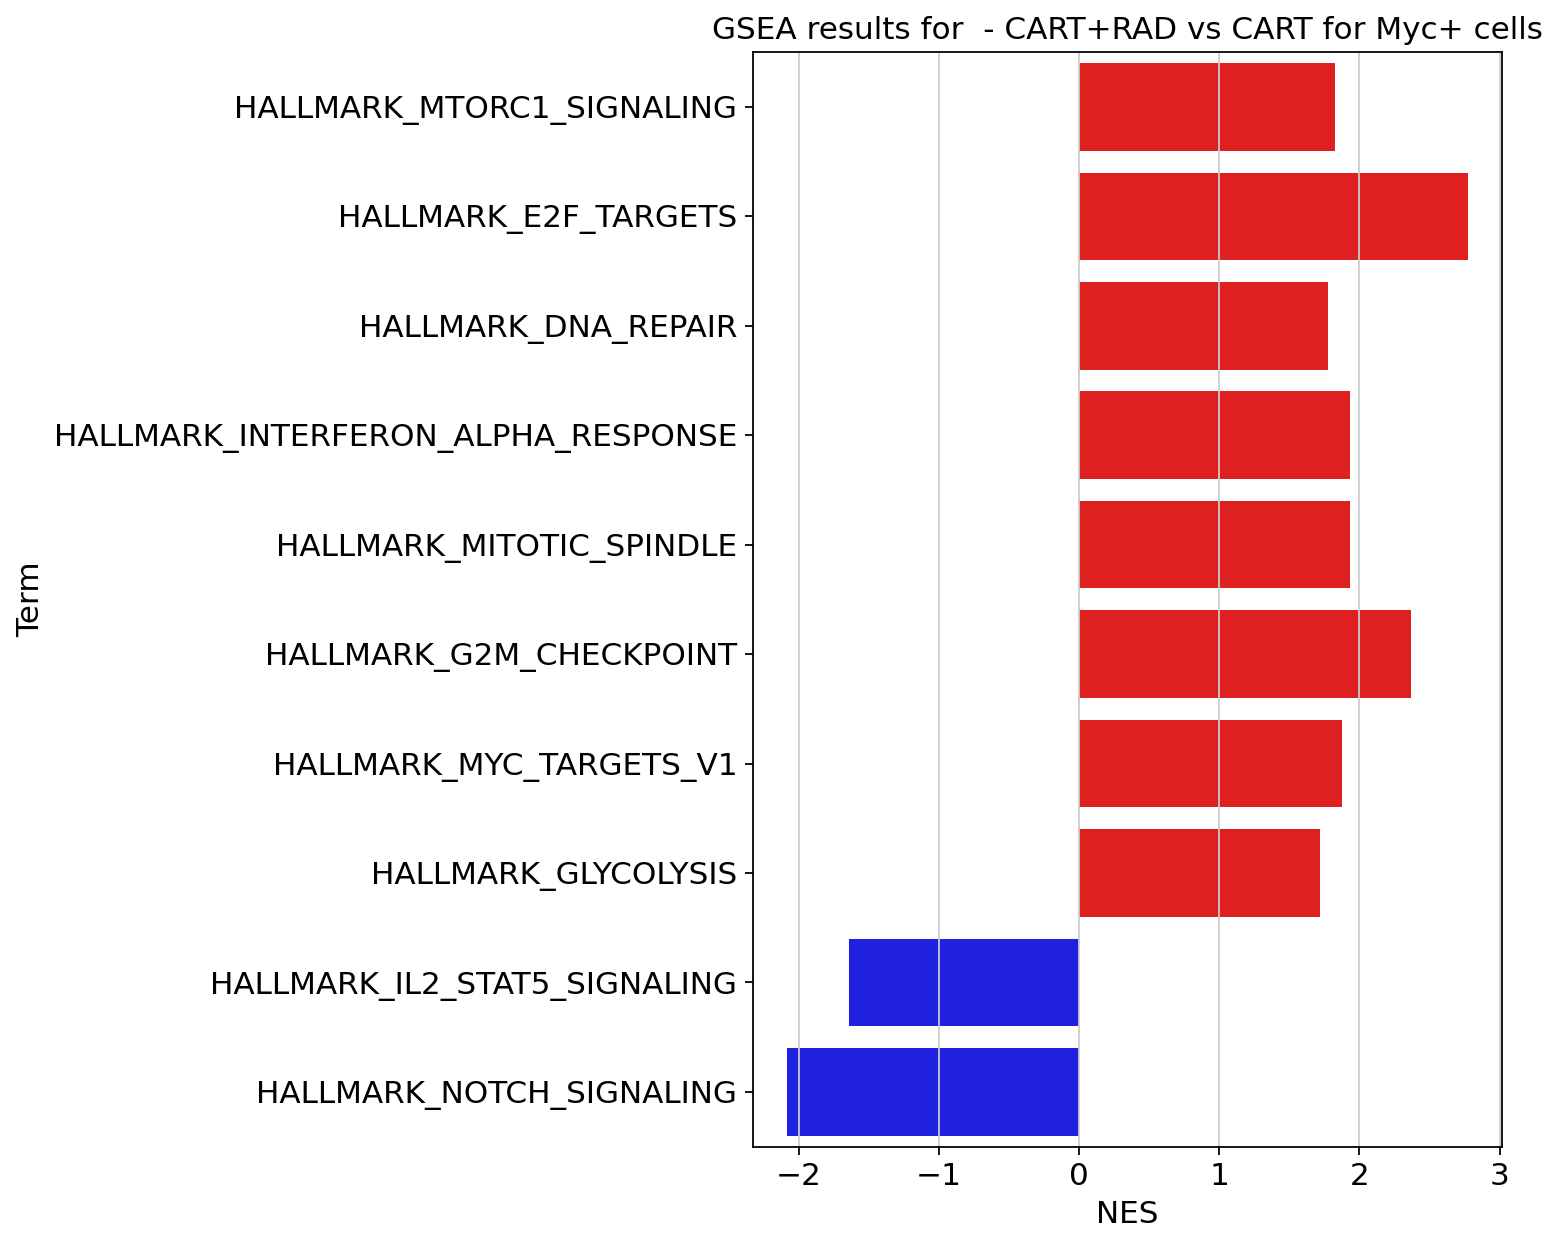

In [28]:
from matplotlib.colors import LinearSegmentedColormap
mat_cell = results_df[['stat']].T.rename(index={'stat': 'Myc_T_cells'})
mat_cell=mat_cell.T
sorted_df = mat_cell.sort_values(by='Myc_T_cells', ascending=False)
res_gsea= dc.get_gsea_df(sorted_df, 'Myc_T_cells', hallmark_df_custom, source='geneset', target='genesymbol', times=1000, min_n=5, seed=42, verbose=False)
#save results
gsea_file_name="GSEA_DF_for_Myc_T_cells.csv"
res_gsea.to_csv(gsea_file_name, index=True)

sorted_res_gsea = res_gsea.sort_values('FDR p-value', ascending=True)
sub_res_ges = sorted_res_gsea[sorted_res_gsea['NOM p-value'] < 0.1].head(10)

# Split the data into positive and negative NES values
positive_nes_data = sub_res_ges[sub_res_ges['NES'] > 0]
negative_nes_data = sub_res_ges[sub_res_ges['NES'] < 0]

# Create the bar plots
plt.figure(figsize=(6, 9))

if not positive_nes_data.empty:
    sns.barplot(data=positive_nes_data, x='NES', y='Term', color='red', dodge=False)

if not negative_nes_data.empty:
    sns.barplot(data=negative_nes_data, x='NES', y='Term', color='blue', dodge=False)

# Customize the plot
plt.xlabel('NES')
plt.ylabel('Term')
plt.title(f'GSEA results for  - CART+RAD vs CART for Myc+ cells')

# Show the plot
plt.show()
